In [2]:
!pip install scikit-learn


In [4]:
pip install matplotlib

  Using cached matplotlib-3.8.3-cp39-cp39-win_amd64.whl.metadata (5.9 kB)
  Using cached contourpy-1.2.0-cp39-cp39-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/162.6 kB ? eta -:--:--
     -------------- ------------------------ 61.4/162.6 kB 3.2 MB/s eta 0:00:01
     -------------- ------------------------ 61.4/162.6 kB 3.2 MB/s eta 0:00:01
     -------------- ------------------------ 61.4/162.6 kB 3.2 MB/s eta 0:00:01
     ------------------------------------ 162.6/162.6 kB 885.8 kB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp39-cp39-win_amd64.whl.metadata (6.5 kB)
  Using cached pillow-10.2.0-cp39-cp39-win_amd64.whl.metadata (9.9 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.8.3-cp39-cp39-win_amd64.whl (7.6 MB)
Using cached contourpy-1.2.0-cp39-cp39-win_amd64.whl (181 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ----

In [13]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy
from keras.models import Sequential, load_model
from keras.layers import Activation, Dense, Flatten, MaxPool2D, Conv2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.metrics import accuracy, categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img,img_to_array
import glob
import random
import shutil
import os
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

In [8]:
os.chdir(r"C:\Users\dell\Documents\Upskill\Project\Weather Recognition")
if os.path.isdir(r"C:\Users\dell\Documents\Upskill\Project\Weather Recognition\train\cloudy") is False:
    os.makedirs(r"C:\Users\dell\Documents\Upskill\Project\Weather Recognition\train\Cloudy")
    os.makedirs(r"C:\Users\dell\Documents\Upskill\Project\Weather Recognition\test\Cloudy")
    os.makedirs(r"C:\Users\dell\Documents\Upskill\Project\Weather Recognition\valid\Cloudy")
    os.makedirs(r"C:\Users\dell\Documents\Upskill\Project\Weather Recognition\train\Rainy")
    os.makedirs(r"C:\Users\dell\Documents\Upskill\Project\Weather Recognition\test\Rainy")
    os.makedirs(r"C:\Users\dell\Documents\Upskill\Project\Weather Recognition\valid\Rainy")
    os.makedirs(r"C:\Users\dell\Documents\Upskill\Project\Weather Recognition\train\Sunny")
    os.makedirs(r"C:\Users\dell\Documents\Upskill\Project\Weather Recognition\test\Sunny")
    os.makedirs(r"C:\Users\dell\Documents\Upskill\Project\Weather Recognition\valid\Sunny")
    os.makedirs(r"C:\Users\dell\Documents\Upskill\Project\Weather Recognition\train\Sunrise_Sunset")
    os.makedirs(r"C:\Users\dell\Documents\Upskill\Project\Weather Recognition\test\Sunrise_Sunset")
    os.makedirs(r"C:\Users\dell\Documents\Upskill\Project\Weather Recognition\valid\Sunrise_Sunset")

In [9]:
for c in random.sample(glob.glob("cloudy*"),150):
    shutil.move(c,r"C:\Users\dell\Documents\Upskill\Project\Weather Recognition\train\Cloudy")
for c in random.sample(glob.glob("rain*"),150):
    shutil.move(c,r"C:\Users\dell\Documents\Upskill\Project\Weather Recognition\train\Rainy")
for c in random.sample(glob.glob("shine*"),150):
    shutil.move(c,r"C:\Users\dell\Documents\Upskill\Project\Weather Recognition\train\Sunny")
for c in random.sample(glob.glob("sunrise*"),150):
    shutil.move(c,r"C:\Users\dell\Documents\Upskill\Project\Weather Recognition\train\Sunrise_Sunset")
for c in random.sample(glob.glob("cloudy*"),15):
    shutil.move(c,r"C:\Users\dell\Documents\Upskill\Project\Weather Recognition\valid\Cloudy")
for c in random.sample(glob.glob("rain*"),15):
    shutil.move(c,r"C:\Users\dell\Documents\Upskill\Project\Weather Recognition\valid\Rainy")
for c in random.sample(glob.glob("shine*"),15):
    shutil.move(c,r"C:\Users\dell\Documents\Upskill\Project\Weather Recognition\valid\Sunny")
for c in random.sample(glob.glob("sunrise*"),15):
    shutil.move(c,r"C:\Users\dell\Documents\Upskill\Project\Weather Recognition\valid\Sunrise_Sunset")
for c in random.sample(glob.glob("cloudy*"),5):
    shutil.move(c,r"C:\Users\dell\Documents\Upskill\Project\Weather Recognition\test\Cloudy")
for c in random.sample(glob.glob("rain*"),5):
    shutil.move(c,r"C:\Users\dell\Documents\Upskill\Project\Weather Recognition\test\Rainy")
for c in random.sample(glob.glob("shine*"),5):
    shutil.move(c,r"C:\Users\dell\Documents\Upskill\Project\Weather Recognition\test\Sunny")
for c in random.sample(glob.glob("sunrise*"),5):
    shutil.move(c,r"C:\Users\dell\Documents\Upskill\Project\Weather Recognition\test\Sunrise_Sunset")

In [3]:
train_path=r"C:\Users\dell\Documents\Upskill\Project\Weather Recognition\train"
valid_path=r"C:\Users\dell\Documents\Upskill\Project\Weather Recognition\valid"
test_path=r"C:\Users\dell\Documents\Upskill\Project\Weather Recognition\test"

In [5]:
train_batch=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory=train_path,target_size=(224,224),classes=["Cloudy","Rainy","Sunny","Sunrise_Sunset"],batch_size=5)
valid_batch=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory=valid_path,target_size=(224,224),classes=["Cloudy","Rainy","Sunny","Sunrise_Sunset"],batch_size=5)
test_batch=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory=test_path,target_size=(224,224),classes=["Cloudy","Rainy","Sunny","Sunrise_Sunset"],batch_size=5,shuffle=False)

Found 600 images belonging to 4 classes.
Found 60 images belonging to 4 classes.
Found 20 images belonging to 4 classes.


In [6]:
img,label=next(train_batch)

In [7]:
def plotimage(img_array):
    fig,axes=plt.subplots(1,5,figsize=[10,10])
    axes=axes.flatten()
    for img,ax in zip(img_array,axes):
        ax.imshow(img)
        ax.axis("off")
    plt.tight_layout()
    plt.show()
        

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


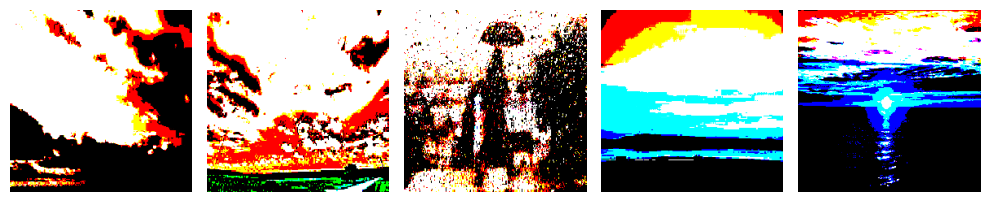

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [8]:
plotimage(img)
print(label)

In [9]:
vgg=tf.keras.applications.vgg16.VGG16()

In [10]:
#build the model
model=Sequential()
for layer in vgg.layers[:-1]:
    model.add(layer)

for layer in model.layers:
    layer.trainable=False

model.add(Dense(units=4,activation="softmax"))

In [11]:
#compile and train the model
model.compile(Adam(learning_rate=0.001),loss="categorical_crossentropy",metrics=["accuracy"])
model.fit(train_batch,validation_data=valid_batch,epochs=10,verbose=2)

Epoch 1/10
120/120 - 93s - loss: 0.4263 - accuracy: 0.8500 - val_loss: 0.2206 - val_accuracy: 0.9500 - 93s/epoch - 779ms/step
Epoch 2/10
120/120 - 93s - loss: 0.1073 - accuracy: 0.9683 - val_loss: 0.2718 - val_accuracy: 0.8667 - 93s/epoch - 773ms/step
Epoch 3/10
120/120 - 115s - loss: 0.0667 - accuracy: 0.9833 - val_loss: 0.2762 - val_accuracy: 0.9000 - 115s/epoch - 961ms/step
Epoch 4/10
120/120 - 99s - loss: 0.0396 - accuracy: 0.9867 - val_loss: 0.2141 - val_accuracy: 0.9667 - 99s/epoch - 824ms/step
Epoch 5/10
120/120 - 103s - loss: 0.0244 - accuracy: 0.9967 - val_loss: 0.2166 - val_accuracy: 0.9500 - 103s/epoch - 857ms/step
Epoch 6/10
120/120 - 106s - loss: 0.0220 - accuracy: 0.9933 - val_loss: 0.2534 - val_accuracy: 0.9167 - 106s/epoch - 886ms/step
Epoch 7/10
120/120 - 126s - loss: 0.0185 - accuracy: 0.9967 - val_loss: 0.2187 - val_accuracy: 0.9500 - 126s/epoch - 1s/step
Epoch 8/10
120/120 - 120s - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.2349 - val_accuracy: 0.9333 - 120s/epoc

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


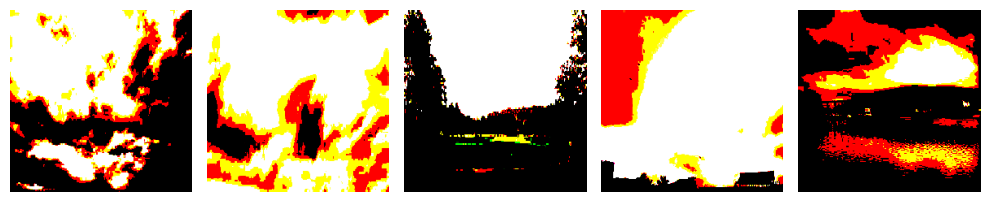

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [12]:
#CHECK
img_test,label_test=next(test_batch)
plotimage(img_test)
print(label_test)

In [14]:
#prediction
predict=model.predict(test_batch,verbose=0)
prediction=numpy.argmax(predict,axis=-1)

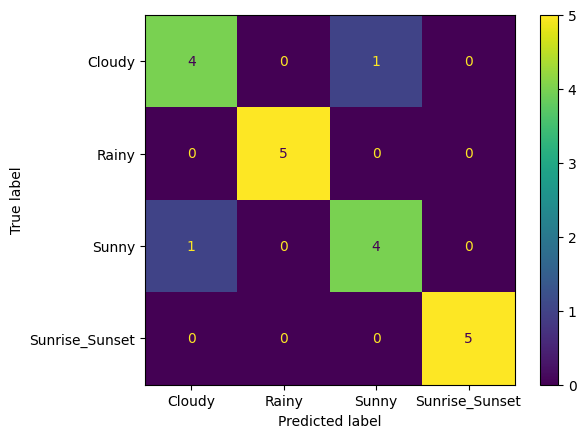

In [15]:
#evaluation
classif=ConfusionMatrixDisplay(confusion_matrix(test_batch.classes,prediction),display_labels=["Cloudy","Rainy","Sunny","Sunrise_Sunset"])
classif.plot()          

In [45]:
# save the model
weather_class=model.save(r"C:\Users\dell\Documents\Upskill\Project\Weather Recognition\weather",save_format="keras")
#saved_weight=model.save_weights(r"C:\Users\dell\Documents\Upskill\Project\Weather Recognition\weather_classif_weights")

INFO:tensorflow:Assets written to: C:\Users\dell\Documents\Upskill\Project\Weather Recognition\weather\assets


INFO:tensorflow:Assets written to: C:\Users\dell\Documents\Upskill\Project\Weather Recognition\weather\assets


In [46]:
#load the model 
weather_classfication_model=load_model(r"C:\Users\dell\Documents\Upskill\Project\Weather Recognition\weather")


In [49]:
#preparing the model
test_img_path=r"C:\Users\dell\Documents\Upskill\Project\Weather Recognition\cloudy286.jpg"
test_img=load_img(test_img_path,target_size=(224,224))
test_img_arr=img_to_array(test_img)
test_img_arr=numpy.expand_dims(test_img_arr,axis=0)
test_img_arr=tf.keras.applications.vgg16.preprocess_input(test_img_arr)

In [51]:
class_labels=["Cloudy","Rainy","Sunny","Sunrise_Sunset"]
test_pred=weather_classfication_model.predict(test_img_arr)
predicted_label=class_labels[numpy.argmax(test_pred)]

print(f"Predicted label:{predicted_label}")

1/1 [==============================] - 0s 312ms/step
Predicted label:Cloudy
